<a href="https://colab.research.google.com/github/SanePai/Covid_Map_Project/blob/main/Covid_Map_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
dt = (datetime.datetime.now(datetime.timezone(datetime.timedelta(hours = 5, minutes = 30)))).strftime('%c')
print(f'Last Updated: {dt}')

Last Updated: Sat Oct 17 10:42:43 2020


In [2]:
import json
import folium
import requests
import mimetypes
import http.client
import pandas as pd
from folium.plugins import HeatMap
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [3]:
conn=http.client.HTTPSConnection("api.covid19api.com");
payload='';
headers={};
conn.request("GET","/summary",payload,headers);
res=conn.getresponse();
data=res.read().decode('UTF-8');

In [4]:
# print(data)

In [5]:
covid1 = json.loads(data);
pd.json_normalize(covid1['Countries'],sep=",");

df = pd.DataFrame(covid1['Countries']);
df

covid2 = df.drop(columns=['CountryCode', 'Slug', 'Date', 'Premium'], axis = 1);
covid2


,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
0,Afghanistan,47,40073,4,1485,69,33516
1,Albania,289,16501,4,443,93,9957
2,Algeria,221,53998,14,1841,253,37856
3,Andorra,187,3377,0,59,46,2057
4,Angola,126,7222,6,234,84,3012
...,...,...,...,...,...,...,...
184,Viet Nam,0,1124,0,35,1,1031
185,Western Sahara,0,10,0,1,0,8
186,Yemen,2,2055,0,596,6,1335
187,Zambia,0,15659,0,346,0,14899


In [6]:
m = folium.Map(min_zoom = 1.5, no_wrap=True, tiles="StamenTerrain");
url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data";
country_shapes = f'{url}/world-countries.json';
# print(country_shapes)

In [7]:
folium.Choropleth(
	geo_data=country_shapes,
	min_zoom=2,
	name='Covid-19',
	data=covid2,
	columns=['Country','TotalConfirmed'],
	key_on='feature.properties.name',
	fill_color='YlOrRd',
	nan_fill_color='black',
	legend_name='Total Confirmed Covid Cases'
).add_to(m);


**Total Confirmed Covid Cases**

In [8]:
coordinates=pd.read_csv('https://raw.githubusercontent.com/SanePai/Covid_Map_Project/main/country-coordinates-world.csv')
coordinates


covid_final=pd.merge(covid2,coordinates,on='Country')
def plotDot(covid_final):
  for index, row in covid_final.iterrows():
    folium.CircleMarker(location=[row['latitude'],row['longitude']],
											radius=row['TotalConfirmed']/500000,
											popup = f"Country:{row['Country']}\nTotal Confirmed: {row['TotalConfirmed']}",
											weight=2,
											fill_color='#000000').add_to(m)


plotDot(covid_final);
m.fit_bounds(m.get_bounds());
m

In [9]:
# print(type(covid_final))
# covid_final

**Total Confirmed Deaths**

In [10]:
#generateBaseMap
m1=folium.Map(tiles='StamenToner',min_zoom=2, no_wrap=True);
m1
#generateHeatMapLayer
deaths=covid_final['TotalDeaths'].astype(float);
lat=covid_final['latitude'].astype(float);
lon=covid_final['longitude'].astype(float);
m1.add_child(HeatMap(zip(lat,lon,deaths),radius=0))


Total active cases per country


In [11]:
#generateBaseMap
m1=folium.Map(tiles='StamenTerrain',min_zoom=2, no_wrap=True);
m1
#generateHeatMapLayer
active=(covid_final['TotalConfirmed'] - covid_final['TotalRecovered'] - covid_final['TotalDeaths']).astype(float);
lat=covid_final['latitude'].astype(float);
lon=covid_final['longitude'].astype(float);
m1.add_child(HeatMap(zip(lat,lon,active),radius=0))

# BAR GRAPHS


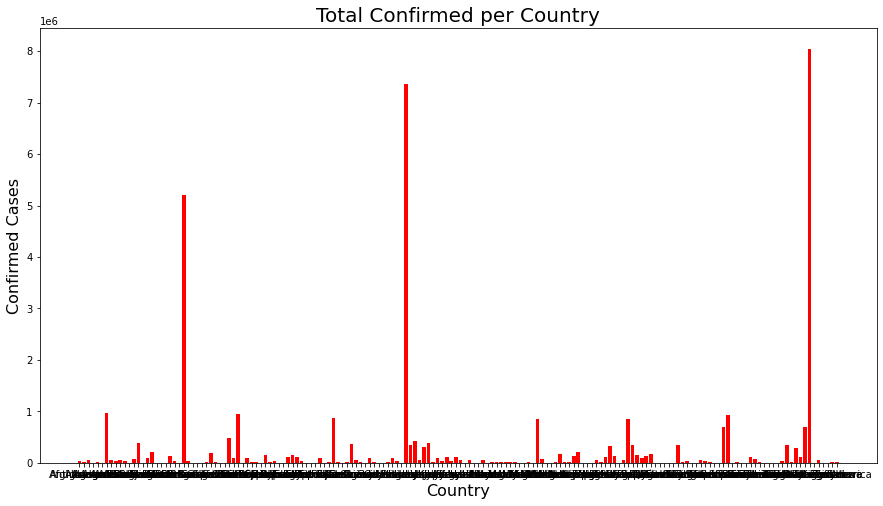

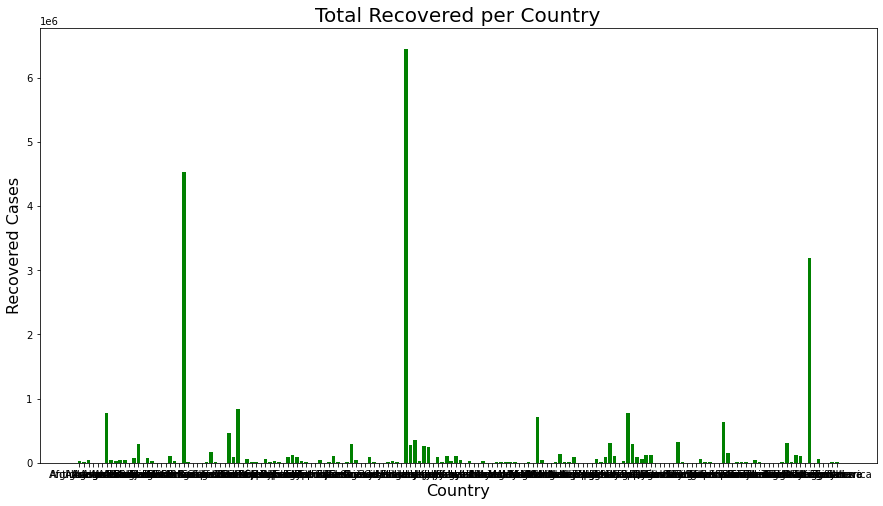

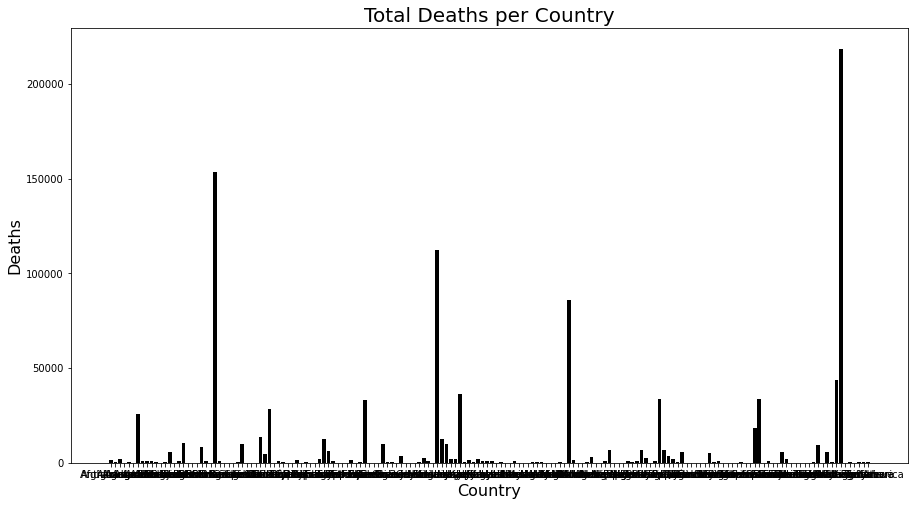

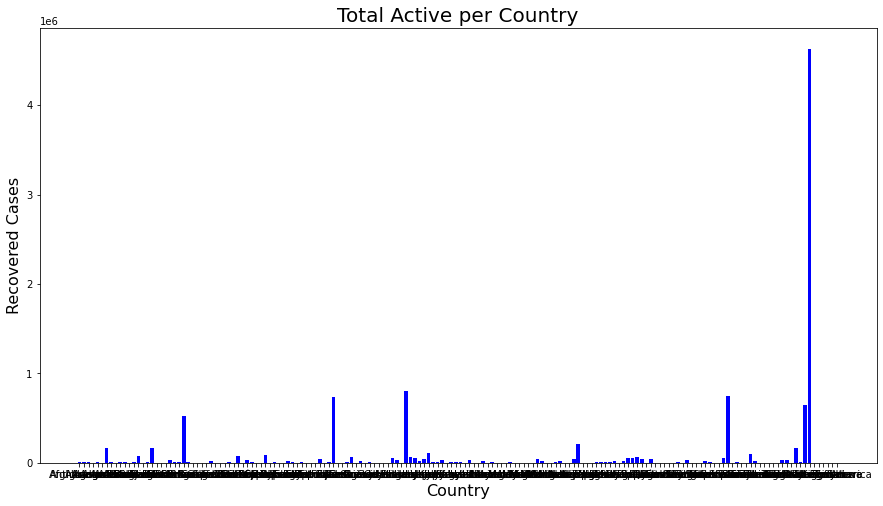

In [12]:
plt.figure(figsize=(15,8))
plt.title("Total Confirmed per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Confirmed Cases", fontsize = 16)
plt.bar(covid_final['Country'], covid_final['TotalConfirmed'], color = 'r')
plt.show()

plt.figure(figsize=(15,8))
plt.title("Total Recovered per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Recovered Cases", fontsize = 16)
plt.bar(covid_final['Country'], covid_final['TotalRecovered'], color = 'g')
plt.show()

plt.figure(figsize=(15,8))
plt.title("Total Deaths per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Deaths", fontsize = 16)
plt.bar(covid_final['Country'], covid_final['TotalDeaths'], color = 'black')
plt.show()

plt.figure(figsize=(15,8))
plt.title("Total Active per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Recovered Cases", fontsize = 16)
plt.bar(covid_final['Country'], active, color = 'blue')
plt.show()

In [13]:
covid_final = covid_final.sort_values(by = ['TotalConfirmed'], ascending=False)


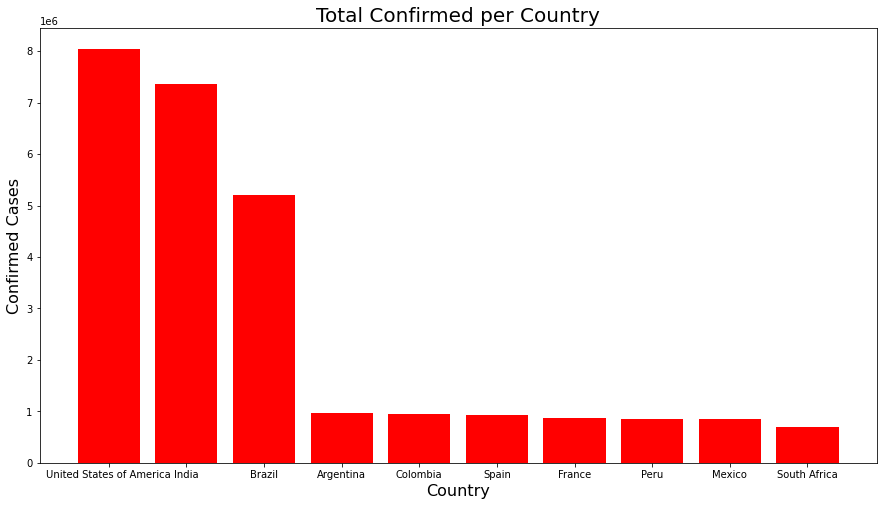

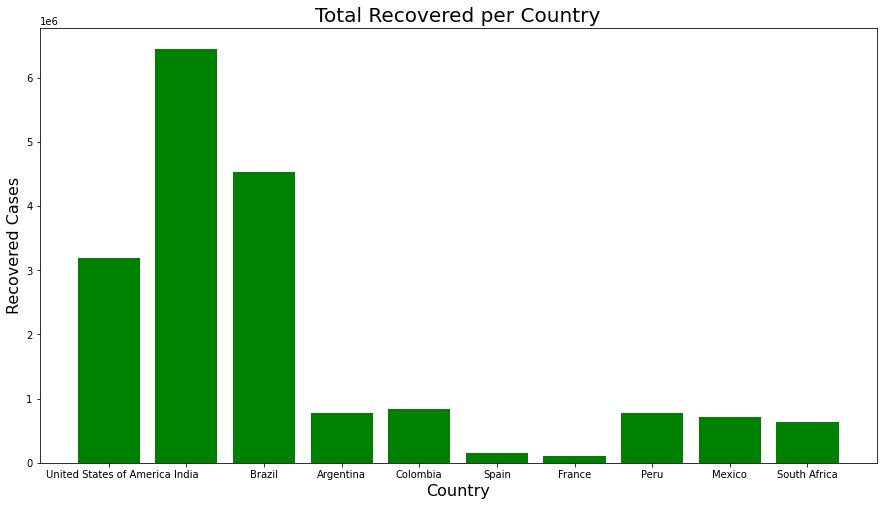

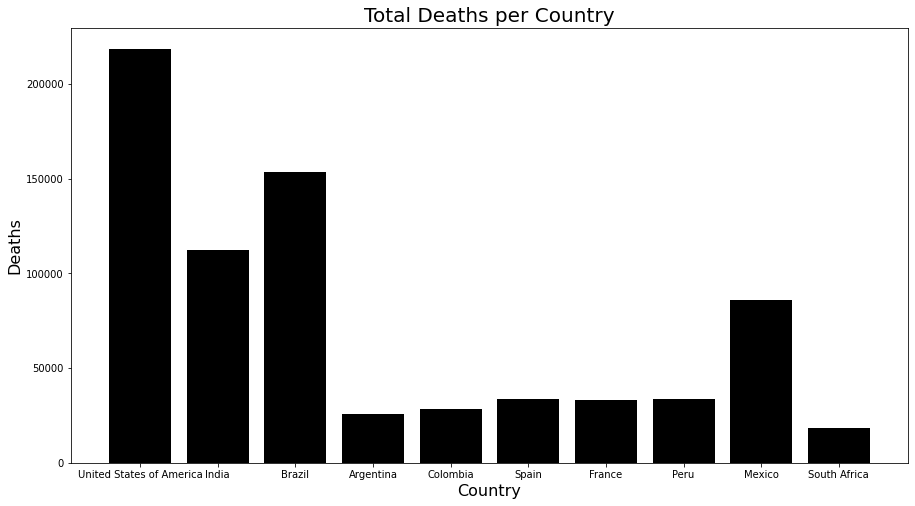

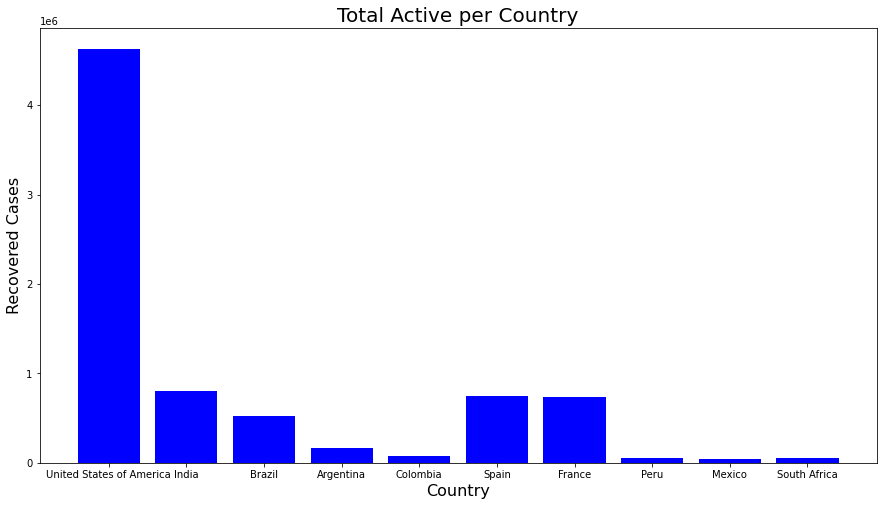

In [14]:
plt.figure(figsize=(15,8))
plt.title("Total Confirmed per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Confirmed Cases", fontsize = 16)
plt.bar(covid_final['Country'][0:10], covid_final['TotalConfirmed'][0:10], color = 'r')
plt.show()

plt.figure(figsize=(15,8))
plt.title("Total Recovered per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Recovered Cases", fontsize = 16)
plt.bar(covid_final['Country'][0:10], covid_final['TotalRecovered'][0:10], color = 'g')
plt.show()

plt.figure(figsize=(15,8))
plt.title("Total Deaths per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Deaths", fontsize = 16)
plt.bar(covid_final['Country'][0:10], covid_final['TotalDeaths'][0:10], color = 'black')
plt.show()

active=(covid_final['TotalConfirmed'] - covid_final['TotalRecovered'] - covid_final['TotalDeaths']).astype(float);
plt.figure(figsize=(15,8))
plt.title("Total Active per Country", fontsize = 20)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Recovered Cases", fontsize = 16)
plt.bar(covid_final['Country'][0:10], active[0:10], color = 'blue')
plt.show()